Hidden Nodes: 5, Train Accuracy: 0.964221824686941, Test Accuracy: 0.9714285714285714
Hidden Nodes: 10, Train Accuracy: 0.9588550983899821, Test Accuracy: 0.9714285714285714
Hidden Nodes: 15, Train Accuracy: 0.9588550983899821, Test Accuracy: 0.9714285714285714
Hidden Nodes: 20, Train Accuracy: 0.9588550983899821, Test Accuracy: 0.9714285714285714
Hidden Nodes: 25, Train Accuracy: 0.9588550983899821, Test Accuracy: 0.9714285714285714
Hidden Nodes: 30, Train Accuracy: 0.960644007155635, Test Accuracy: 0.9714285714285714
Hidden Layers: 1, Train Accuracy: 0.9588550983899821, Test Accuracy: 0.9714285714285714
Hidden Layers: 2, Train Accuracy: 0.964221824686941, Test Accuracy: 0.9642857142857143
Hidden Layers: 3, Train Accuracy: 0.9677996422182469, Test Accuracy: 0.9714285714285714
Hidden Layers: 4, Train Accuracy: 0.9892665474060823, Test Accuracy: 0.9785714285714285
Hidden Layers: 5, Train Accuracy: 0.9964221824686941, Test Accuracy: 0.9857142857142858
Hidden Layers: 6, Train Accuracy: 0.

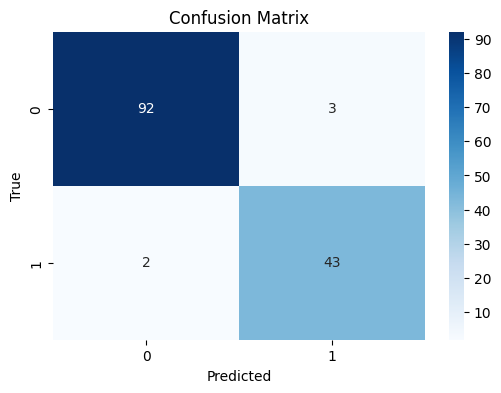

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-processed data
df = pd.read_csv('/content/breast-cancer.txt')
df.dropna(inplace=True)
df = df._get_numeric_data()
df.drop(columns=['id'], inplace=True)

X = np.array(df.drop(columns=['class']))
y = np.array(df['class'] == 4).astype(int)

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Test and evaluate the network's performance with varying nodes
nodes_list = [5, 10, 15, 20, 25, 30]
for nodes in nodes_list:
    clf = MLPClassifier(hidden_layer_sizes=(nodes,), random_state=42, max_iter=1000)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Hidden Nodes: {nodes}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Task 5: Progressively increase the number of layers
layers_list = list(range(1, 11))
for num_layers in layers_list:
    clf = MLPClassifier(hidden_layer_sizes=(10,) * num_layers, random_state=42, max_iter=1000)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Hidden Layers: {num_layers}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Task 7: Design a network with 4 hidden layers and introduce dropout
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4]
for rate in dropout_rates:
    clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), random_state=42, max_iter=1000,
                        alpha=rate, solver='adam', activation='relu', learning_rate_init=0.001)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Dropout Rate: {rate}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Task 8: Try different activation functions for the hidden layers
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
for activation in activation_functions:
    clf = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42, max_iter=1000,
                        activation=activation)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Activation Function: {activation}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Task 9: Visualize the results in a confusion matrix
clf = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42, max_iter=1000, activation='relu')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()